In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
curve_cordinates = []

In [5]:
def create_curve():
    x = np.arange(-100,100,1)
    for i in x:
        curve_cordinates.append([i,np.sin(i*math.pi/10)])

curve_cordinates = []
create_curve()

In [6]:
def plot_curve(arr_2D, show_flag):
    x_cord = []
    y_cord = []
    
    for i in range(len(arr_2D)):
        x_cord.append(arr_2D[i][0])
        y_cord.append(arr_2D[i][1])
    
    if show_flag == False:
        plt.plot(x_cord,y_cord)
    else:
        plt.plot(x_cord,y_cord, marker='o')
        plt.show()

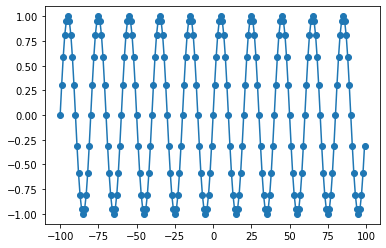

In [7]:
plot_curve(curve_cordinates,True)

In [8]:
curve_cordinates[20]

[-80, 9.797174393178826e-16]

In [9]:
# Return a,b and c parameters of a line for the passed points
def line_equation(a,b):
    x1 = a[0]
    y1 = a[1]
    x2 = b[0]
    y2 = b[1]
    
    #print(f"points are ({x1},{y1}) & ({x2},{y2})")    
    # Todo ---------------------->> handle the vertical and horizontal lines
    
    # Equation of line is ax+by+c=0. with a = (y2-y1), b=(x1-x2) and c = ax1+by1
    # (-10,100) and (10,100)
    #a = y2 - y1
    #b = x1 - x2
   # c = a*x1 + b*y1

    m = (y2 - y1)/(x2 - x1)
    c1 = y1 - m*x1
    a = -m
    b = 1
    c = -c1
    
    return a,b,c
    

In [10]:
# Calculate the distance of a point from the line
# parameter
# a,b and c are of the line. 
# p point 
def distance_of_point_from_line(a,b,c,p):
    x1 = p[0]
    y1 = p[1]
    
    # distance of a point from the line is calcualted using |ax1+by1+c|/sqrt(a^2+b^2)
    Numr = abs(a*x1 + b*y1 + c)
    Deno = math.sqrt(a*a + b*b)
    dist = Numr/Deno
    #print(f"{a},{b},{c},({x1},{y1}),{dist}")
    return dist

In [11]:
threshold = 0.1
critical_points = []

def split_algorithm(curve_cordinates,start_index, end_index):
    
    # For debugging only. Delete after done.
    #start_point = curve_cordinates[start_index]
    #end_point = curve_cordinates[end_index]
    
    dist_max = 0
    
    # Obtian the line equation
    line_a,line_b,line_c = line_equation(curve_cordinates[start_index], curve_cordinates[end_index])
    
    if (abs(start_index - end_index) == 1):
        return
    
    for i in range(start_index+1, end_index):
        
        dist = distance_of_point_from_line(line_a,line_b,line_c,curve_cordinates[i])
        
        #print(f"Split algo start_point {start_point} end_point {end_point} curve_cordinates {curve_cordinates[i]} dist {dist}")
        
        if (dist > threshold) and (dist > dist_max):             
            dist_max = dist
            dist_max_index = i
    
    if dist_max == 0:
        return
    
    # Append the critical point to the critical points list
    critical_points.append(curve_cordinates[dist_max_index])
    split_algorithm(curve_cordinates,start_index,dist_max_index)
    split_algorithm(curve_cordinates,dist_max_index,end_index)
    
    
    

In [12]:
critical_points.append(curve_cordinates[0])
split_algorithm(curve_cordinates,0, len(curve_cordinates)-1)
critical_points.append(curve_cordinates[len(curve_cordinates)-1])

In [13]:
critical_points = np.array(critical_points)
critical_points

array([[-1.00000000e+02,  1.22464680e-15],
       [ 8.50000000e+01,  1.00000000e+00],
       [ 7.50000000e+01, -1.00000000e+00],
       [ 6.50000000e+01,  1.00000000e+00],
       [ 5.50000000e+01, -1.00000000e+00],
       [ 4.50000000e+01,  1.00000000e+00],
       [ 3.50000000e+01, -1.00000000e+00],
       [ 2.50000000e+01,  1.00000000e+00],
       [ 1.50000000e+01, -1.00000000e+00],
       [ 5.00000000e+00,  1.00000000e+00],
       [-5.00000000e+00, -1.00000000e+00],
       [-1.50000000e+01,  1.00000000e+00],
       [-2.50000000e+01, -1.00000000e+00],
       [-3.50000000e+01,  1.00000000e+00],
       [-4.50000000e+01, -1.00000000e+00],
       [-5.50000000e+01,  1.00000000e+00],
       [-6.50000000e+01, -1.00000000e+00],
       [-7.50000000e+01,  1.00000000e+00],
       [-8.50000000e+01, -1.00000000e+00],
       [-9.40000000e+01,  9.51056516e-01],
       [-9.70000000e+01,  8.09016994e-01],
       [-8.70000000e+01, -8.09016994e-01],
       [-9.20000000e+01,  5.87785252e-01],
       [-7.

In [14]:
critical_points = critical_points[critical_points[:, 0].argsort()]
critical_points
len(critical_points)

62

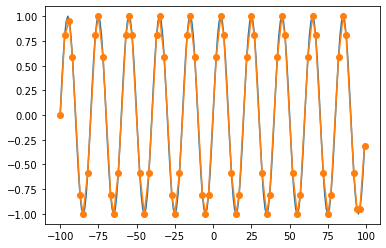

In [15]:
plot_curve(curve_cordinates,False)
plot_curve(critical_points,True)

In [16]:
def find_side_length(first_point, second_point):
    dist = (second_point[0] - first_point[0])**2 + (second_point[1] - first_point[1])**2
    len = math.sqrt(dist)
    return len 

In [17]:
def angle_between_lines(first_point, second_point, third_point):
    
    a = find_side_length(first_point,second_point)
    b = find_side_length(second_point,third_point)
    c= find_side_length(third_point,first_point)
    
    cos_theta = ((a**2) + (b**2) - (c**2)) / (2*a*b)
    theta = math.degrees(math.acos(cos_theta))
    #tan_theta = (a2*b1 - a1*b2)/(a1*a2 + b1*b2)
    #theta = math.degrees(math.atan(tan_theta))
    #if (theta < 0):
        #theta = 360 - theta
    return theta   

In [18]:
# Merge Algo
# Assumption- The list is already sorted and only those insignificant critical points needs to be removed
# threshhold tan(175) = -0.0874886635
# Threshold tan(185) = 0.087
# tan(190) = 0.1763
# tan(177.5) = 0.0436609429

merged_critical_point = []
# Threshold in degrees
merge_threshold = 5


def merge(critical_points):
    
    # Add the first point to the list
    merged_critical_point.append(list(critical_points[0]))
    
    # -2 is done becoz each point is comapred with its next two neighbours
    for i in range(0,len(critical_points)-2):
        first_point = critical_points[i]
        second_point = critical_points[i+1]
        third_point = critical_points[i+2]
        
        angle_b_lines = angle_between_lines(first_point,second_point,third_point)
        print(f"first_point: {first_point} Second_point: {second_point} Third_point: {third_point} angle:{angle_b_lines}")
        
        if ((180-angle_b_lines) > merge_threshold):
            merged_critical_point.append(list(second_point))
        
    merged_critical_point.append(list(critical_points[len(critical_points)-1]))

In [19]:
merge(critical_points)

first_point: [-1.0000000e+02  1.2246468e-15] Second_point: [-97.           0.80901699] Third_point: [-94.           0.95105652] angle:167.6186554237803
first_point: [-97.           0.80901699] Second_point: [-94.           0.95105652] Third_point: [-92.           0.58778525] angle:166.99454777991363
first_point: [-94.           0.95105652] Second_point: [-92.           0.58778525] Third_point: [-87.          -0.80901699] angle:174.68646024716418
first_point: [-92.           0.58778525] Second_point: [-87.          -0.80901699] Third_point: [-85.  -1.] angle:169.84645910052498
first_point: [-87.          -0.80901699] Second_point: [-85.  -1.] Third_point: [-82.          -0.58778525] angle:166.72155002596915
first_point: [-85.  -1.] Second_point: [-82.          -0.58778525] Third_point: [-77.           0.80901699] angle:172.2154683514289
first_point: [-82.          -0.58778525] Second_point: [-77.           0.80901699] Third_point: [-75.   1.] angle:169.846459100525
first_point: [-77.   

In [20]:
print (len(critical_points))

62


In [21]:
angle_between_lines(critical_points[0],critical_points[1],critical_points[2])

167.6186554237803

In [22]:
merged_critical_point

[[-100.0, 1.2246467991473533e-15],
 [-97.0, 0.8090169943749491],
 [-94.0, 0.9510565162951543],
 [-92.0, 0.5877852522924722],
 [-87.0, -0.8090169943749491],
 [-85.0, -1.0],
 [-82.0, -0.5877852522924695],
 [-77.0, 0.8090169943749469],
 [-75.0, 1.0],
 [-72.0, 0.5877852522924725],
 [-67.0, -0.809016994374949],
 [-65.0, -1.0],
 [-62.0, -0.5877852522924725],
 [-57.0, 0.8090169943749489],
 [-55.0, 1.0],
 [-53.0, 0.8090169943749481],
 [-48.0, -0.5877852522924736],
 [-45.0, -1.0],
 [-42.0, -0.5877852522924727],
 [-37.0, 0.8090169943749477],
 [-35.0, 1.0],
 [-32.0, 0.5877852522924728],
 [-27.0, -0.8090169943749476],
 [-25.0, -1.0],
 [-22.0, -0.5877852522924722],
 [-17.0, 0.8090169943749476],
 [-15.0, 1.0],
 [-12.0, 0.587785252292473],
 [-7.0, -0.8090169943749475],
 [-5.0, -1.0],
 [-3.0, -0.8090169943749475],
 [2.0, 0.5877852522924731],
 [5.0, 1.0],
 [7.0, 0.8090169943749475],
 [12.0, -0.587785252292473],
 [15.0, -1.0],
 [17.0, -0.8090169943749476],
 [22.0, 0.5877852522924722],
 [25.0, 1.0],
 [27

In [23]:
critical_points

array([[-1.00000000e+02,  1.22464680e-15],
       [-9.70000000e+01,  8.09016994e-01],
       [-9.40000000e+01,  9.51056516e-01],
       [-9.20000000e+01,  5.87785252e-01],
       [-8.70000000e+01, -8.09016994e-01],
       [-8.50000000e+01, -1.00000000e+00],
       [-8.20000000e+01, -5.87785252e-01],
       [-7.70000000e+01,  8.09016994e-01],
       [-7.50000000e+01,  1.00000000e+00],
       [-7.20000000e+01,  5.87785252e-01],
       [-6.70000000e+01, -8.09016994e-01],
       [-6.50000000e+01, -1.00000000e+00],
       [-6.20000000e+01, -5.87785252e-01],
       [-5.70000000e+01,  8.09016994e-01],
       [-5.50000000e+01,  1.00000000e+00],
       [-5.30000000e+01,  8.09016994e-01],
       [-4.80000000e+01, -5.87785252e-01],
       [-4.50000000e+01, -1.00000000e+00],
       [-4.20000000e+01, -5.87785252e-01],
       [-3.70000000e+01,  8.09016994e-01],
       [-3.50000000e+01,  1.00000000e+00],
       [-3.20000000e+01,  5.87785252e-01],
       [-2.70000000e+01, -8.09016994e-01],
       [-2.

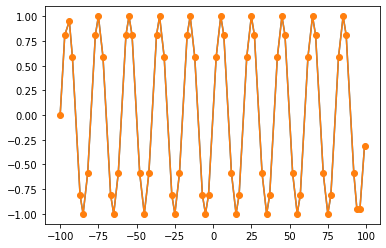

In [24]:
plot_curve(critical_points,False)
plot_curve(merged_critical_point, True)

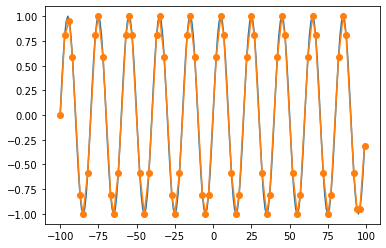

In [25]:
plot_curve(curve_cordinates,False)
plot_curve(merged_critical_point, True)

In [ ]:
plot